# Classification - Banking Data Set

## Importing data

Import the csv file on your google drive and link it to the colab notebook using the following cells.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv", delimiter=";")
#df  = pd.read_csv("bank-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Converting string to numeric data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordEncoder = OrdinalEncoder()

for i in df.columns:
  if df[i].dtype == "object" and i != "y":
      a = df[i].values.reshape(-1,1)
      df[i] = ordEncoder.fit_transform(a)
      print(f" For column {i} the classes are {ordEncoder.categories_}")

 For column job the classes are [array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)]
 For column marital the classes are [array(['divorced', 'married', 'single'], dtype=object)]
 For column education the classes are [array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)]
 For column default the classes are [array(['no', 'yes'], dtype=object)]
 For column housing the classes are [array(['no', 'yes'], dtype=object)]
 For column loan the classes are [array(['no', 'yes'], dtype=object)]
 For column contact the classes are [array(['cellular', 'telephone', 'unknown'], dtype=object)]
 For column month the classes are [array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)]
 For column poutcome the classes are [array(['failure', 'other', 'success', 'unknown'], dtype=object)]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if i == "y":
    a = df[i].values
    df[i] = le.fit_transform(a)
    print(f" For column {i} the classes are {le.classes_}")

 For column y the classes are ['no' 'yes']


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


## Separating X and y columns

In [ ]:
X = df.iloc[:, :16].values
print(X)

[[ 58.   4.   1. ...  -1.   0.   3.]
 [ 44.   9.   2. ...  -1.   0.   3.]
 [ 33.   2.   1. ...  -1.   0.   3.]
 ...
 [ 72.   5.   1. ... 184.   3.   2.]
 [ 57.   1.   1. ...  -1.   0.   3.]
 [ 37.   2.   1. ... 188.  11.   1.]]


In [ ]:
y = df.loc[:, "y"].values
print(y)

[0 0 0 ... 1 0 0]


In [ ]:
print(X.shape)

(45211, 16)


In [ ]:
print(y.shape)

(45211,)


##Splitting the data into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    stratify = y,
                                                    random_state = 42)

In [ ]:
print(f'Number of samples and attributes: {X_train.shape}')

Number of samples and attributes: (36168, 16)


## EDA

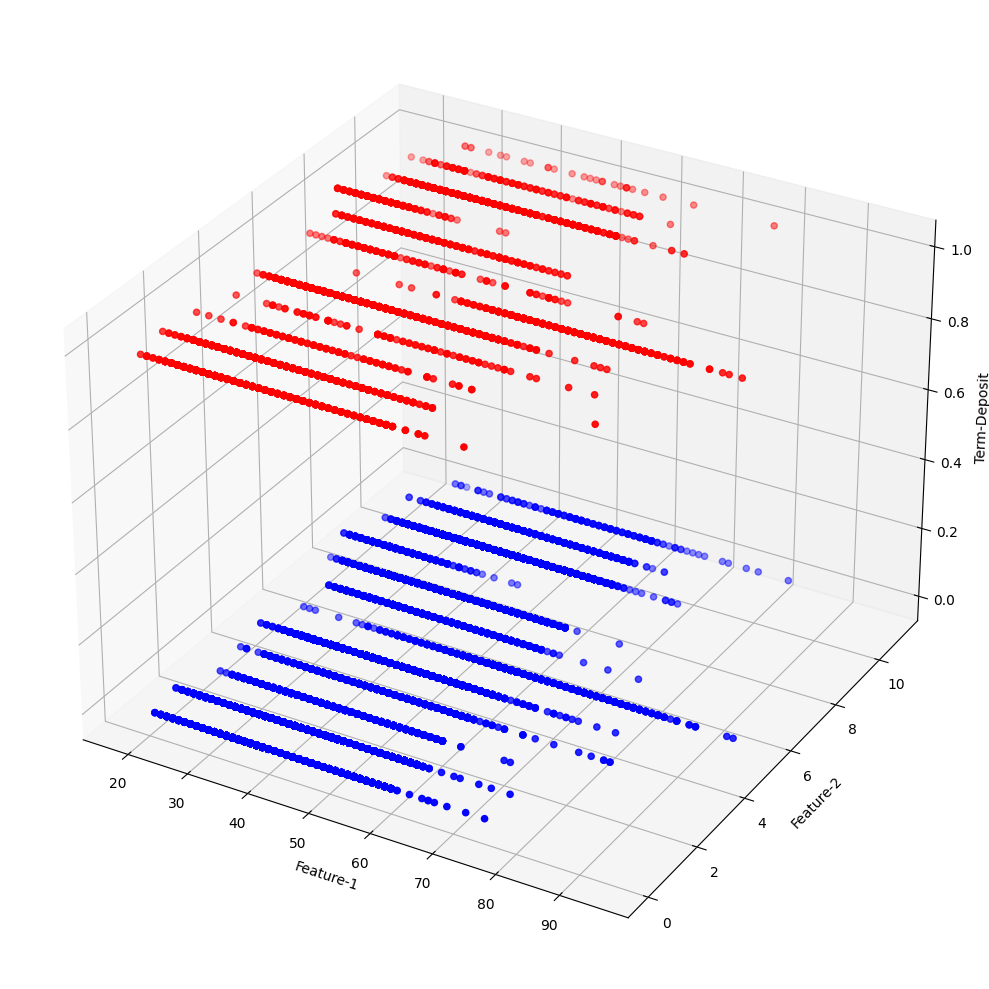

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection = '3d')

ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("Feature-1")
ax.set_ylabel("Feature-2")
ax.set_zlabel("Term-Deposit")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)

X_train_2D_pca = pca2.transform(X_train_std)

print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (36168, 2)


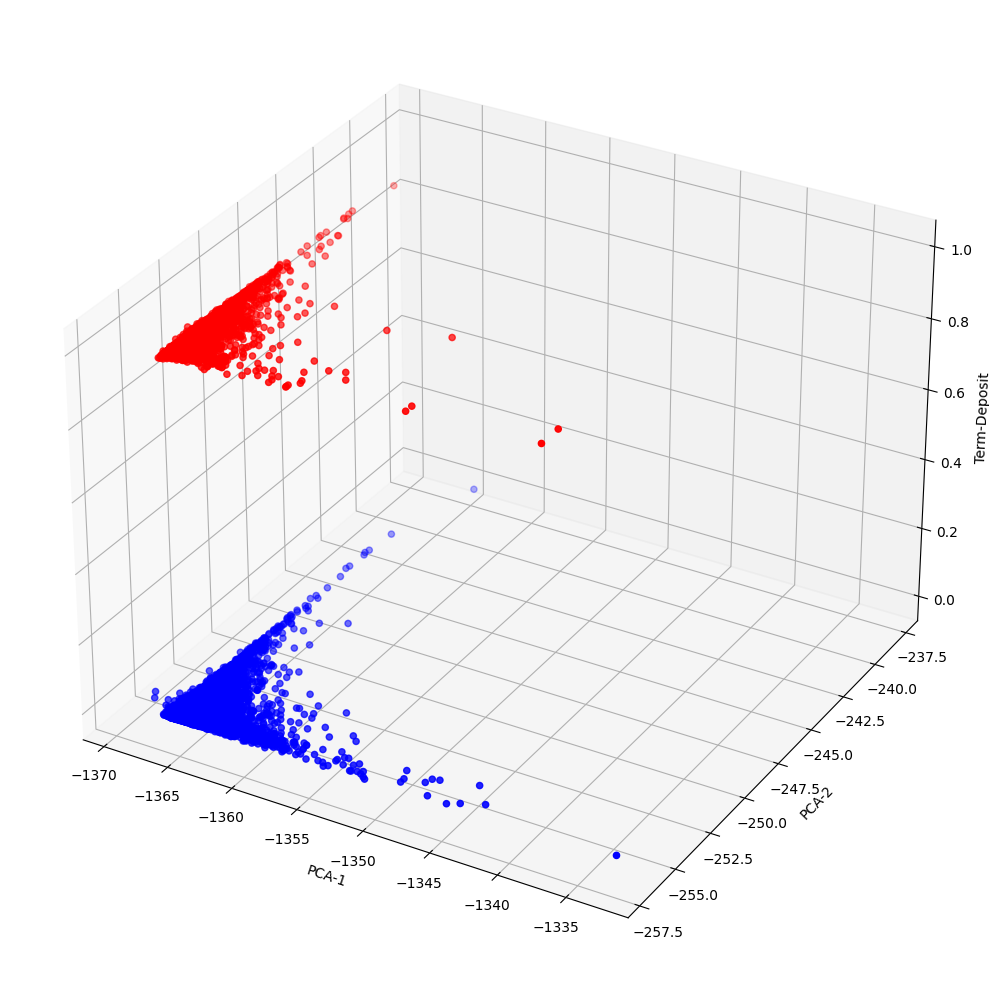

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1], y_train[y_train==0], color="b")
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1], y_train[y_train==1], color="r")

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Term-Deposit")

plt.tight_layout()
plt.show()

## Using tSNE for Dimensionality reduction

In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 80.6 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_train_2D_tsne = tsne2.fit_transform(X_train_2D_pca)

print(f'tSNE Embedding: Number of samples and attributes: {X_train_2D_tsne.shape}')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


tSNE Embedding: Number of samples and attributes: (36168, 2)


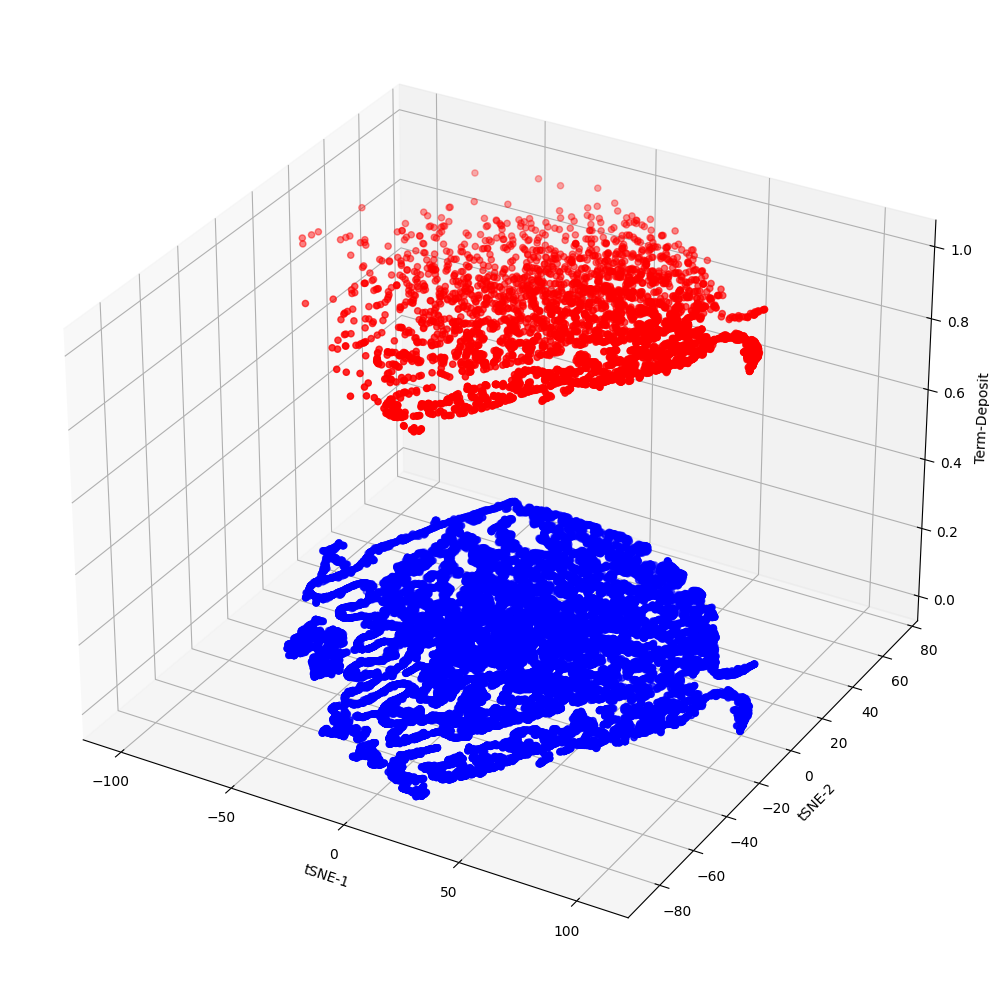

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[y_train==0, 0], X_train_2D_tsne[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_tsne[y_train==1, 0], X_train_2D_tsne[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Term-Deposit")

plt.tight_layout()
plt.show()

## Logistic Regression for Binary Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
score = lr_clf.score(X_test, y_test)
print(f"Classification accuracy using raw data is {score}%")

Classification accuracy using raw data is 0.8854362490324007%


#### Apply standard scaling

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
score_std = lr_clf_std.score(X_test_std, y_test)

print(f'Classification accuracy after feature scaling is {score_std}%')
print(f"Classification accuracy using raw data is {score}%")

Classification accuracy after feature scaling is 0.8912971359062258%
Classification accuracy using raw data is 0.8854362490324007%


#### Values Predicted by the model?

In [ ]:
print(X_test_std.shape)

(9043, 16)


In [ ]:
y_pred = lr_clf_std.predict(X_test_std)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(y_test)

[0 0 0 ... 0 0 0]


#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confMatrix)

[[7821  164]
 [ 819  239]]


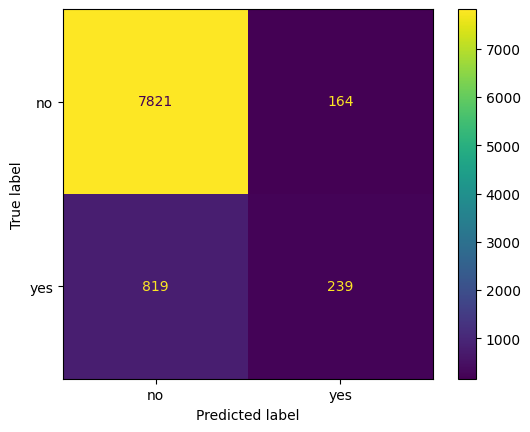

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix,
                              display_labels= le.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision: 0.593
Recall: 0.226
F1: 0.327


## Visualize classification probability

In [ ]:
print(X_train_2D_pca.shape)

(36168, 2)


In [ ]:
X_test_2D_pca = pca2.transform(X_test_std)

In [ ]:
print(X_train_2D_pca.shape)
print(X_test_2D_pca.shape)

(36168, 2)
(9043, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

pca2_lr_clf = LogisticRegression()
pca2_lr_clf.fit(X_train_2D_pca, y_train)
pca2_score = pca2_lr_clf.score(X_test_2D_pca, y_test)

print(f"PCA 2D score : {pca2_score}")

PCA 2D score : 0.8870949906004645


In [ ]:
print(X_train_2D_pca.min())
print(X_train_2D_pca.max())

df_pca = pd.DataFrame(data = X_train_2D_pca, columns = [0,1])
df_pca.head()

-1369.0319735215107
-237.9286276020367


,0,1
0,-1366.138765,-256.365381
1,-1365.069567,-253.410441
2,-1366.328568,-250.208686
3,-1366.419719,-256.773489
4,-1366.336146,-256.687555


In [ ]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
0,36168.0,-1365.973353,1.000088,-1369.031974,-1366.394501,-1366.271375,-1365.951831,-1333.136898
1,36168.0,-255.908276,1.000119,-256.912194,-256.508432,-256.210298,-255.679941,-237.928628


In [ ]:
print(X_test_2D_pca.min())
print(X_test_2D_pca.max())

df_pca = pd.DataFrame(data = X_train_2D_pca, columns = [0,1])
df_pca.head()

-1367.4107535927421
-244.23245088266034


,0,1
0,-1366.138765,-256.365381
1,-1365.069567,-253.410441
2,-1366.328568,-250.208686
3,-1366.419719,-256.773489
4,-1366.336146,-256.687555


In [ ]:
xx = np.linspace(X_train_2D_pca[:,0].min(), X_train_2D_pca[:,0].max(), 100)
yy = np.linspace(X_train_2D_pca[:,1].min(), X_train_2D_pca[:,1].max(), 100).T

xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
y_pred = pca2_lr_clf.predict(X_test_2D_pca)
probas = pca2_lr_clf.predict_proba(Xfull)
n_classes = np.unique(y).size

In [ ]:
print(probas.shape)
print(n_classes)

(10000, 2)
2


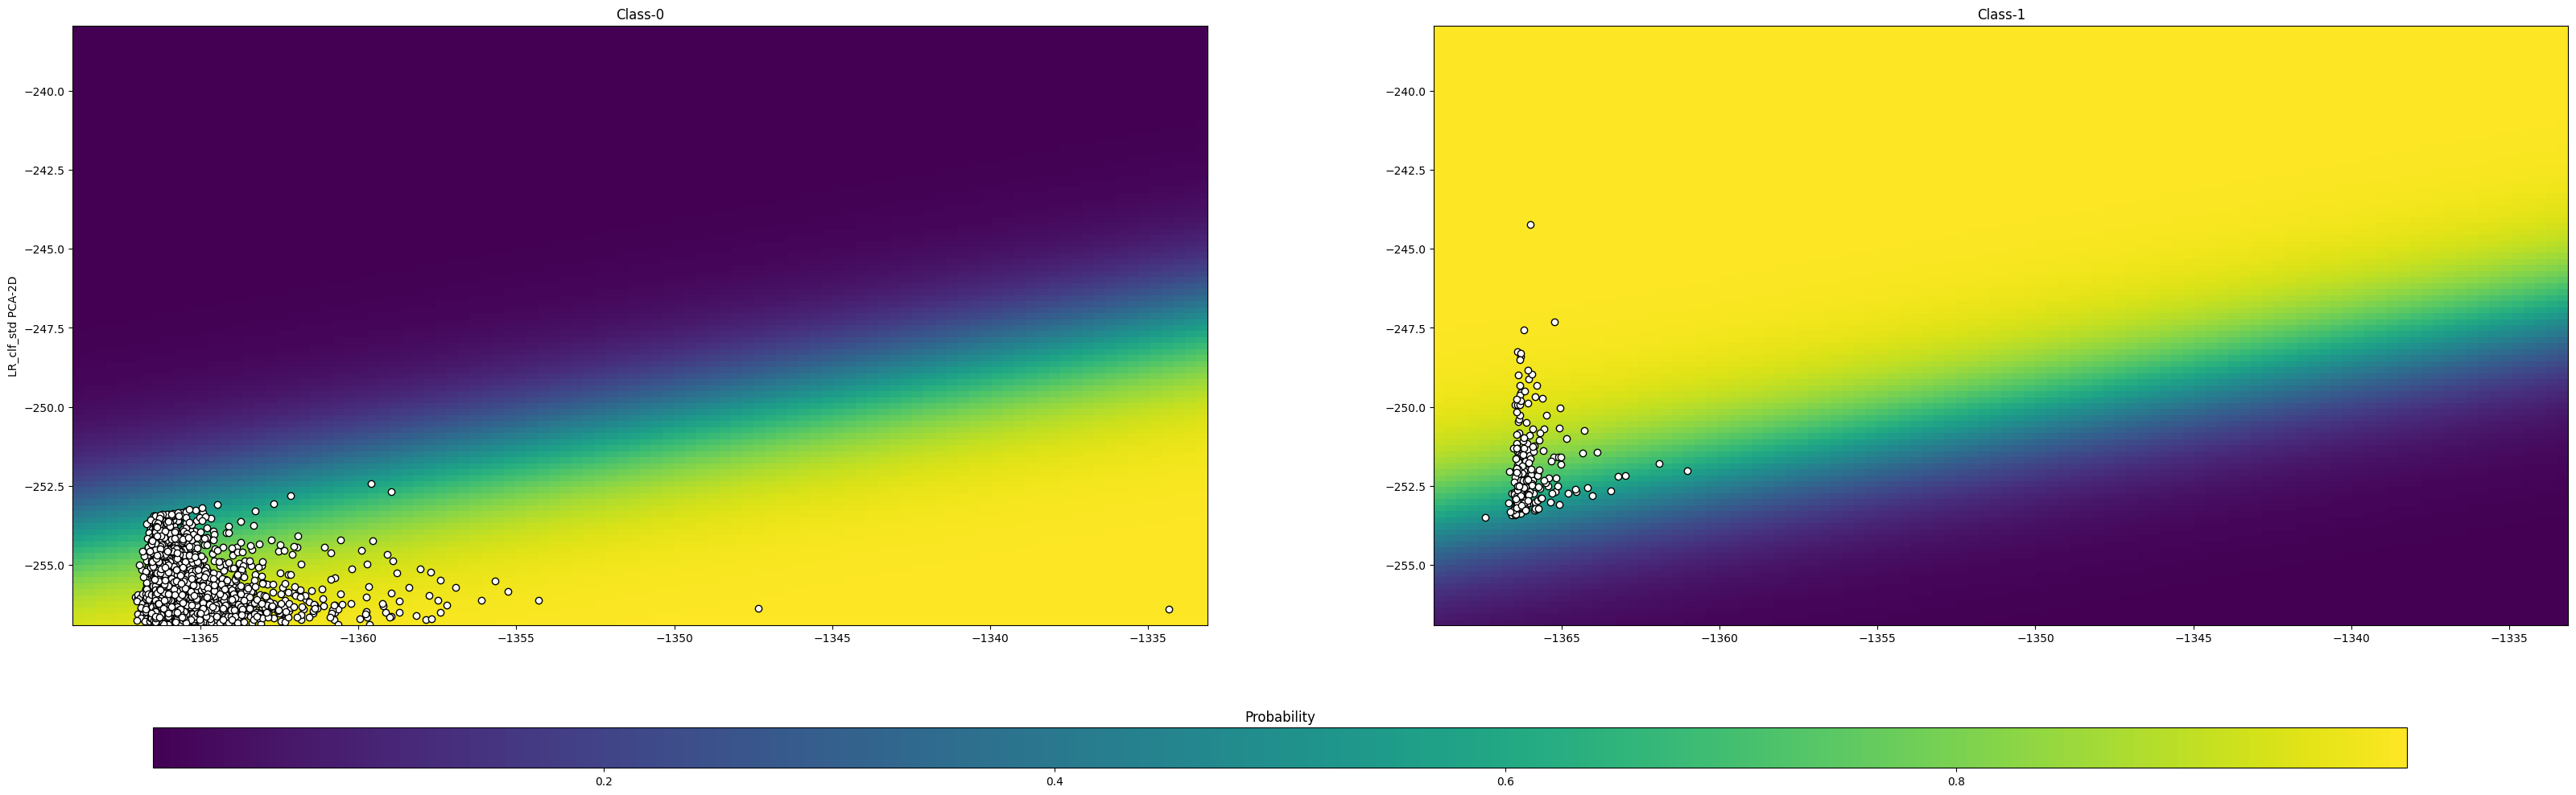

In [ ]:
plt.figure(figsize=(40, 10))
plt.subplots_adjust(bottom=0.2, top=0.98)


for k in range(n_classes):
  plt.subplot(1,2,k+1)
  plt.title(f'Class-{k}')

  if k == 0:
      plt.ylabel('LR_clf_std PCA-2D')



  imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                             extent=(X_train_2D_pca[:,0].min(), X_train_2D_pca[:,0].max(),
                             X_train_2D_pca[:,1].min(), X_train_2D_pca[:,1].max()), origin="lower")

#plt.xticks(())
#plt.yticks(())

  idx = y_pred == k

  if idx.any():
      plt.scatter(X_test_2D_pca[idx, 0], X_test_2D_pca[idx, 1],
                  marker="o", c="w", edgecolor="k")

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")
plt.show()


##SVM Classification

In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Linear SVM

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn import svm
linearSVM = svm.SVC(kernel='linear')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
linearSVM.fit(X_train_2D_pca, y_train)

SVC(kernel='linear')

In [ ]:
predicted = linearSVM.predict(X_test_2D_pca)
print(predicted[:5])
print(y_test[:5])

[0 0 0 0 0]
[0 0 0 0 0]


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.00      0.00      0.00      1058

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


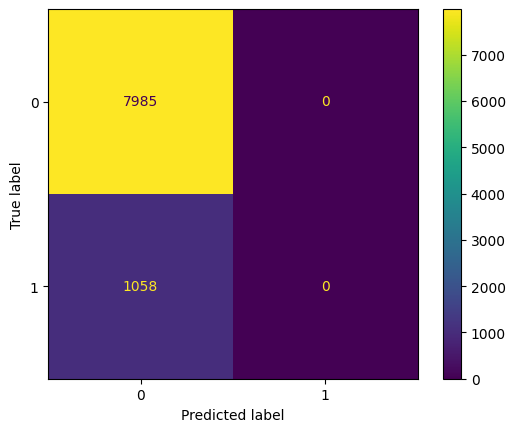

In [ ]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n" %(linearSVM, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()


### RBF SVM

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.45      0.01      0.02      1058

    accuracy                           0.88      9043
   macro avg       0.67      0.50      0.48      9043
weighted avg       0.83      0.88      0.83      9043




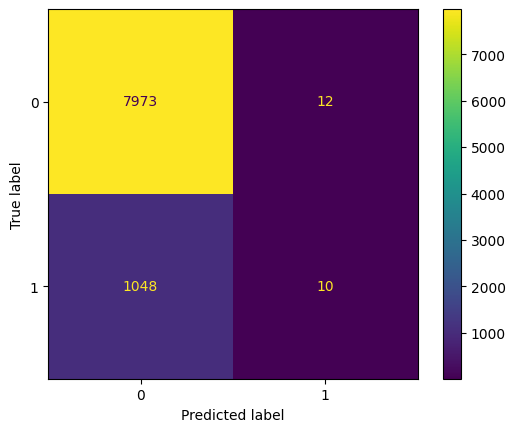

In [ ]:
kernelSVM = svm.SVC(kernel='rbf')
kernelSVM.fit(X_train, y_train)
predicted = kernelSVM.predict(X_test)
print("Classification report for classifier %s:\n%s\n" %(kernelSVM, metrics.classification_report(y_test, predicted)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()


In [ ]:
#   Unable to run polynomial SVM


#from sklearnex import patch_sklearn
# patch_sklearn()

# kernelSVM_poly = svm.SVC(kernel='poly')
# kernelSVM_poly.fit(X_train, y_train)
# predicted = kernelSVM.predict(X_test)
# print("Classification report for classifier %s:\n%s\n" %(kernelSVM_poly, metrics.classification_report(y_test, predicted)))
# confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
# disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
# disp.plot()
# plt.show()

###After standard scaling

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.00      0.00      0.00      1058

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043




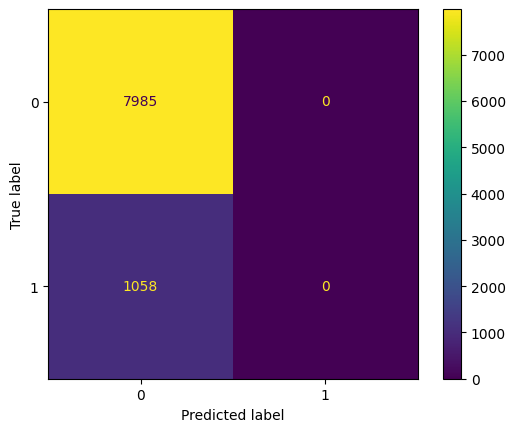

In [ ]:
linearSVM_std = svm.SVC(kernel='linear')
linearSVM_std.fit(X_train_std, y_train)
predicted = linearSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n" %(linearSVM_std, metrics.classification_report(y_test, predicted)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.65      0.26      0.37      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043




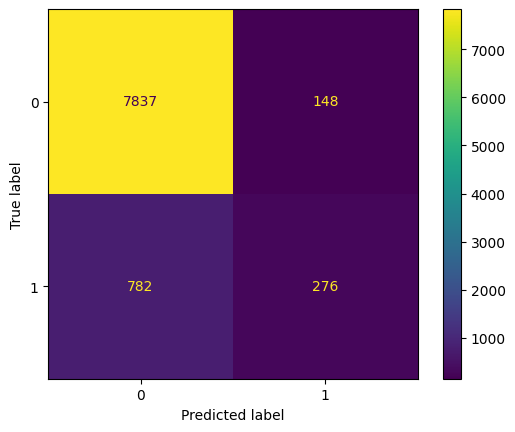

In [ ]:
kernelSVM_std = svm.SVC(kernel='rbf')
kernelSVM_std.fit(X_train_std, y_train)
predicted = kernelSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n" %(kernelSVM_std, metrics.classification_report(y_test, predicted)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier SVC(kernel='poly'):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.00      0.00      0.00      1058

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043




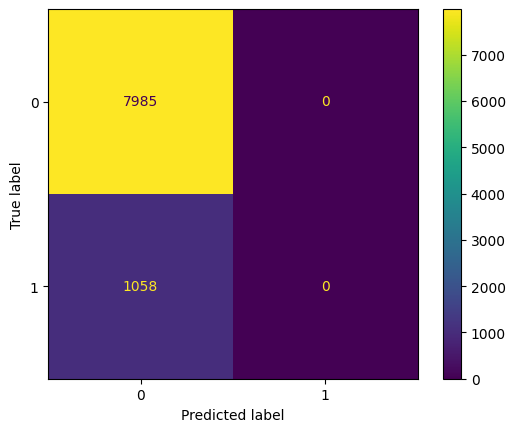

In [ ]:
kernelSVM_poly_std = svm.SVC(kernel='poly')
kernelSVM_poly_std.fit(X_train_std, y_train)
predicted = kernelSVM.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n" %(kernelSVM_poly_std, metrics.classification_report(y_test, predicted)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#logistic Regression Model
cross_score_lr_reg = cross_val_score(lr_clf, X_train, y_train, scoring="f1",cv = 5)
print(cross_score_lr_reg)

/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[0.24456522 0.28082808 0.27289048 0.28235294 0.29302736]


/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Standard Scaling Model
cross_score_std = cross_val_score(lr_clf_std, X_train_std, y_train, scoring="f1",cv = 5)
print(cross_score_std)

[0.31019709 0.31746032 0.31713555 0.32427695 0.31423611]


In [ ]:
#Linear SVM Model
from sklearnex import patch_sklearn
patch_sklearn()
cross_score_lin_svm = cross_val_score(linearSVM, X_train_2D_pca, y_train, scoring="f1",cv = 5)
print(cross_score_lin_svm)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[0. 0. 0. 0. 0.]


In [ ]:
#Kernel RBF SVM model
cross_score_rbf_svm = cross_val_score(kernelSVM, X_train, y_train,scoring="f1", cv = 5)
print(cross_score_rbf_svm)

[0.01392111 0.02097902 0.02320186 0.0117096  0.01396973]


In [ ]:
#Unable to Run Polynomial SVm

# score_poly_svm = cross_val_score(kernelSVM, X_train_std, y_train, cv = 5)
# print(score_poly_svm)

In [ ]:
#SVM Models after standard scaling
cross_score_lin_svm_std = cross_val_score(linearSVM_std, X_train_std, y_train,scoring="f1", cv = 5)
print(cross_score_lin_svm_std)

[0. 0. 0. 0. 0.]


In [ ]:
cross_score_rbf_svm_std = cross_val_score(kernelSVM_std, X_train_std, y_train, scoring="f1",cv = 5)
print(cross_score_rbf_svm_std)

[0.38860972 0.37068966 0.37801832 0.38945578 0.38215488]


In [ ]:
cross_score_poly_svm_std = cross_val_score(kernelSVM_poly_std, X_train_std, y_train, scoring="f1",cv = 5)
print(cross_score_poly_svm_std)

[0.29250457 0.30712303 0.28442029 0.28676471 0.28440367]


In [ ]:
# print("Softmax regression regular Score: %0.2f accuracy with a standard deviation of %0.2f" % (score_lr_reg.mean(), score_lr_reg.std()))
# print("Softmax Regression of Standard Scaling Score: %0.2f accuracy with a standard deviation of %0.2f" % (score_std.mean(), score_std.std()))
# print("RBF SVM Regular Score: %0.2f accuracy with a standard deviation of %0.2f" % (score_rbf_svm.mean(), score_rbf_svm.std()))
# print("Linear SVM of Standard Scaling Score : %0.2f accuracy with a standard deviation of %0.1f" % (score_lin_svm_std.mean(), score_lin_svm_std.std()))
# print("RBF SVM of Standard Scaling Score: %0.2f accuracy with a standard deviation of %0.2f" % (score_rbf_svm_std.mean(), score_rbf_svm_std.std()))
# print("Polynomial SVM of Standard scaling Score: %0.2f accuracy with a standard deviation of %0.2f" % (score_poly_svm_std.mean(), score_poly_svm_std.std()))

In [ ]:
print("Softmax regression regular Score: %0.3f (+/- %0.3f)" % (cross_score_lr_reg.mean(), cross_score_lr_reg.std()))
print("Softmax regression of Standard Scaling  Score: %0.3f (+/- %0.3f)" % (cross_score_std.mean(), cross_score_std.std()))

print("Linear SVM Regular Score: %0.3f (+/- %0.3f)" % (cross_score_lin_svm.mean(), cross_score_lin_svm.std()))
print("RBF SVM Regular Score: %0.3f (+/- %0.3f)" % (cross_score_rbf_svm.mean(),cross_score_rbf_svm.std()))

print("Linear SVM of Standard Scaling Score : %0.3f (+/- %0.3f)" % (cross_score_lin_svm_std.mean(), cross_score_lin_svm_std.std()))
print("RBF SVM of Standard Scaling Score: %0.3f (+/- %0.3f)" % (cross_score_rbf_svm_std.mean(), cross_score_rbf_svm_std.std()))
print("Polynomial SVM of Standard scaling Score: %0.3f (+/- %0.3f)" % (cross_score_poly_svm_std.mean(), cross_score_poly_svm_std.std()))



Softmax regression regular Score: 0.275 (+/- 0.016)
Softmax regression of Standard Scaling  Score: 0.317 (+/- 0.005)
Linear SVM Regular Score: 0.000 (+/- 0.000)
RBF SVM Regular Score: 0.017 (+/- 0.004)
Linear SVM of Standard Scaling Score : 0.000 (+/- 0.000)
RBF SVM of Standard Scaling Score: 0.382 (+/- 0.007)
Polynomial SVM of Standard scaling Score: 0.291 (+/- 0.009)


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clas = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_clas.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
tree_r2 = tree_clas.score(X_test, y_test)

In [ ]:
cols = df.columns
len(cols)


17

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clas, out_file="Class_tree.dot", feature_names = cols[0:16],class_names = ['0', '1'], rounded = True,filled = True)

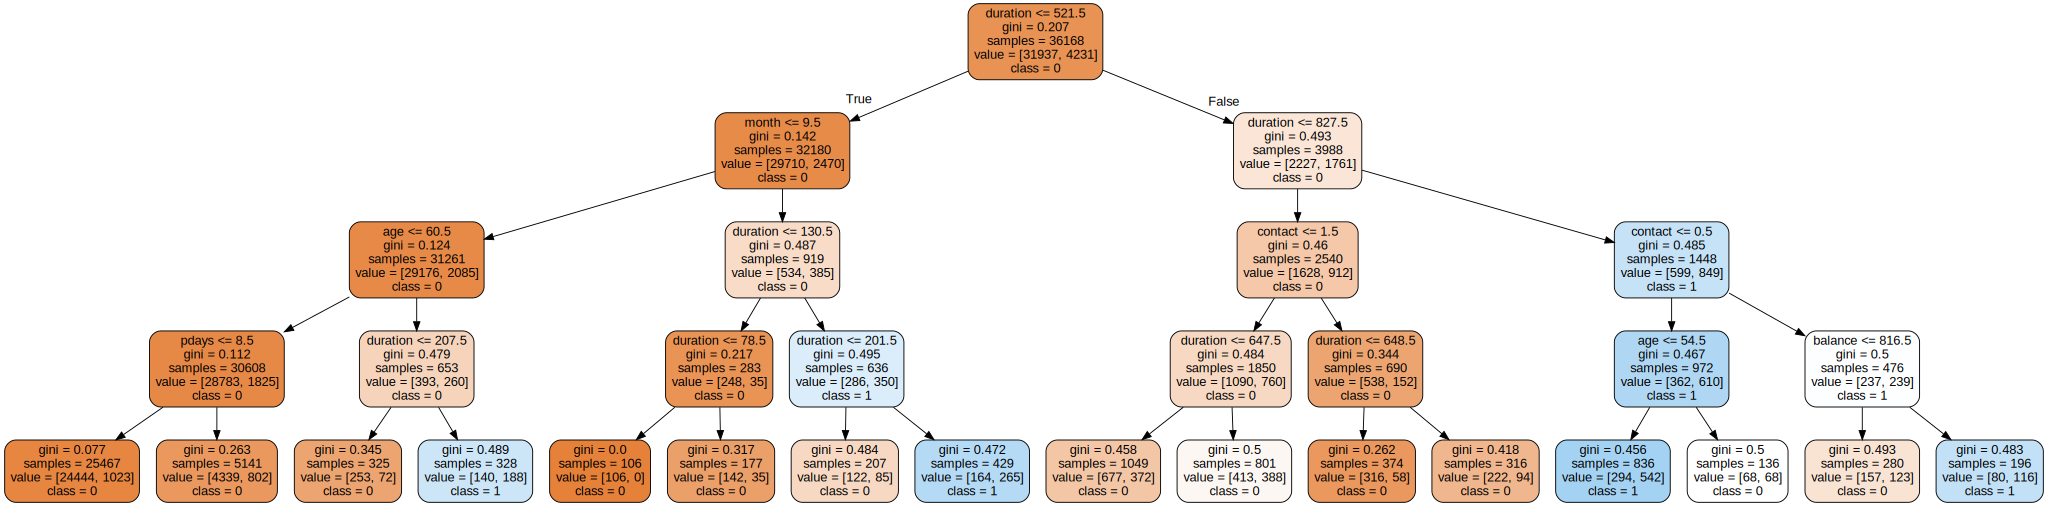

In [ ]:
from graphviz import Source
Source.from_file("Class_tree.dot")

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=100, n_jobs=-1)

In [ ]:
bag_r2 = bag_clf.score(X_test, y_test)
bag_r2

0.8885325666261197

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
rndf_r2 = rnd_clf.score(X_test, y_test)
rndf_r2

0.8862103284308305

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 100, algorithm ="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train,y_train)
ada_r2 = ada_clf.score(X_test, y_test)
ada_r2

0.8971580227800509

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth = 2, n_estimators = 100, learning_rate = 1.0)
gb_clf.fit(X_train, y_train)
gb_r2 = gb_clf.score(X_test, y_test)
gb_r2

0.90755280327325

## Scores of all the models based on accuracy

In [ ]:
score_lin_svm = linearSVM.score(X_test_2D_pca, y_test)
score_lin_svm_std = linearSVM_std.score(X_test_std, y_test)

score_rbf_svm = kernelSVM.score(X_test, y_test)
score_rbf_svm_std = kernelSVM_std.score(X_test_std, y_test)

score_poly_svm_std = kernelSVM_poly_std.score(X_test_std, y_test)

## Cross Validation - Decision Tree and Random Forest Classifier

In [ ]:
#Decision Tree model
cross_score_dt = cross_val_score(tree_clas, X_train, y_train, scoring="f1",cv = 5)
print(cross_score_dt)

[0.33134073 0.41909023 0.40583942 0.33447099 0.39686275]


In [ ]:
#Bagging Classification
cross_score_bag = cross_val_score(bag_clf, X_train, y_train, scoring="f1",cv = 5)
print(cross_score_bag)

[0.22962963 0.32529044 0.32033898 0.33448276 0.29866667]


In [ ]:
#Random Forest Classifier
cross_score_rnd = cross_val_score(rnd_clf, X_train, y_train, scoring="f1",cv = 5)
print(cross_score_rnd)

[0.05714286 0.07900677 0.06575964 0.07440812 0.04592423]


In [ ]:
#AdaBoost
cross_score_ada = cross_val_score(ada_clf, X_train, y_train, scoring="f1",cv = 5)
print(cross_score_ada)

[0.43292683 0.42638777 0.4219345  0.42969984 0.44919786]


In [ ]:
#Gradient Boost
cross_score_gb = cross_val_score(gb_clf, X_train, y_train, scoring= "f1", cv = 5)
print(cross_score_gb)

[0.51408935 0.50176678 0.50648464 0.52848318 0.56742323]


In [ ]:
#Decision Tree model on whole set
cross_score_dt_std = cross_val_score(tree_clas, X, y, scoring="f1",cv = 5)
print(cross_score_dt_std)

[0.2532391  0.03851641 0.18579235 0.1895288  0.32270169]


In [ ]:
#Bagging Classification on whole set
cross_score_bag_std = cross_val_score(bag_clf, X, y, scoring="f1",cv = 5)
print(cross_score_bag_std)

[0.05291971 0.34285714 0.14431373 0.09139214 0.30075188]


In [ ]:
#Random Forest Classifier on whole set
cross_score_rnd_std = cross_val_score(rnd_clf, X, y,scoring="f1", cv = 5)
print(cross_score_rnd_std)

[0.         0.         0.03012552 0.01535088 0.37681159]


In [ ]:
#AdaBoost on whole set
cross_score_ada_std = cross_val_score(ada_clf, X, y, scoring="f1",cv = 5)
print(cross_score_ada_std)

[0.04255319 0.19221106 0.20251572 0.16721311 0.35412287]


In [ ]:
#Gradient Boost
cross_score_gb_std = cross_val_score(gb_clf, X, y, scoring= "f1", cv = 5)
print(cross_score_gb_std)

[0.09213662 0.07897545 0.10870567 0.22598522 0.29721467]


In [ ]:
print("Decision Tree Score: %0.3f (+/- %0.3f)" % (cross_score_dt.mean(), cross_score_dt.std()))
print("Entire Set Decision Tree Score: %0.3f (+/- %0.3f)" % (cross_score_dt_std.mean(), cross_score_dt_std.std()))
print("Bagging Score: %0.3f (+/- %0.3f)" % (cross_score_bag.mean(), cross_score_bag.std()))
print("Entire Set Bagging Score: %0.3f (+/- %0.3f)" % (cross_score_bag_std.mean(), cross_score_bag_std.std()))
print("Random Forest Classifier Score : %0.3f (+/- %0.3f)" % (cross_score_rnd.mean(), cross_score_rnd.std()))
print("Entire Set Random Forest Classifier Score : %0.3f (+/- %0.3f)" % (cross_score_rnd_std.mean(), cross_score_rnd_std.std()))
print("Ada Boosting Score: %0.3f (+/- %0.3f)" % (cross_score_ada.mean(), cross_score_ada.std()))
print("Entire Set Ada Boosting Score: %0.3f (+/- %0.3f)" % (cross_score_ada_std.mean(), cross_score_ada_std.std()))

Decision Tree Score: 0.378 (+/- 0.037)
Entire Set Decision Tree Score: 0.198 (+/- 0.094)
Bagging Score: 0.302 (+/- 0.038)
Entire Set Bagging Score: 0.186 (+/- 0.115)
Random Forest Classifier Score : 0.064 (+/- 0.012)
Entire Set Random Forest Classifier Score : 0.084 (+/- 0.147)
Boosting Score: 0.432 (+/- 0.009)
Entire Set Boosting Score: 0.192 (+/- 0.099)


In [ ]:
model=['Logistic Regression','Linear SVM','RBF SVM', 'Poly SVM']
cv_score_train=[cross_score_lr_reg.mean(), cross_score_lin_svm.mean(), cross_score_rbf_svm.mean(), "nan"]
cv_score_whole=[cross_score_std.mean(), cross_score_lin_svm_std.mean(), cross_score_rbf_svm_std.mean(), cross_score_poly_svm_std.mean()]

mod1=pd.DataFrame([model,cv_score_train, cv_score_whole]).transpose()
mod1.columns=['model','Pre - scaled','Post - Scaled']
mod1.set_index('model')

,Pre - scaled,Post - Scaled
model,,
Logistic Regression,0.274733,0.316661
Linear SVM,0.0,0.0
RBF SVM,0.016756,0.381786
Poly SVM,nan,0.291043


In [ ]:
model=[ 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost','Gradient Boost']
cv_score_train=[ cross_score_dt.mean(), cross_score_bag.mean(),
                cross_score_rnd.mean(), cross_score_ada.mean(), cross_score_gb.mean()]
cv_score_whole=[ cross_score_dt_std.mean(), cross_score_bag_std.mean(), cross_score_rnd_std.mean(), cross_score_ada_std.mean(), cross_score_gb_std.mean()]

mod1=pd.DataFrame([model,cv_score_train, cv_score_whole]).transpose()
mod1.columns=['model','Training set','entire set']
mod1.set_index('model')

,Training set,entire set
model,,
Decision Tree,0.377521,0.197956
Bagging,0.301682,0.186447
Random Forest,0.064448,0.084458
AdaBoost,0.432029,0.191723
Gradient Boost,0.523649,0.160604


In [ ]:
model=['Baseline - Softmax Regression','Linear SVM','RBF SVM','Polynomial SVM','Decision Tree','Bagging','Random Forest','AdaBoost','Gradient Boost']
acc_prestd=[score, score_lin_svm, score_rbf_svm, 'NA', tree_r2,bag_r2,rndf_r2,ada_r2, gb_r2]
acc_poststd=[score_std, score_lin_svm_std, score_rbf_svm_std, score_poly_svm_std,'NA','NA','NA','NA','NA']

mod1=pd.DataFrame([model,acc_prestd, acc_poststd]).transpose()
mod1.columns=['model','Accuracy pre-scaled','Accuracy post-scaled']
mod1.set_index('model')

,Accuracy pre-scaled,Accuracy post-scaled
model,,
Baseline - Softmax Regression,0.885436,0.891297
Linear SVM,0.883003,0.883003
RBF SVM,0.882782,0.897158
Polynomial SVM,NA,0.891961
Decision Tree,0.891739,NA
Bagging,0.888533,NA
Random Forest,0.88621,NA
AdaBoost,0.897158,NA
Gradient Boost,0.907553,NA


## Hyperparamter Tuning

### Random Forest Classifier

#### Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hpt_rf_clf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
param_rf = [{'n_estimators':[100,500,1000],
            'max_depth': [5,10,15]}]
grid_search_rf = GridSearchCV(estimator = hpt_rf_clf,
                              param_grid = param_rf,
                              cv = 5)
grid_search_rf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'n_estimators': [100, 500, 1000]}])

In [ ]:
print(grid_search_rf.best_score_)

0.9055519160197205


In [ ]:
print(grid_search_rf.best_params_)

{'max_depth': 15, 'n_estimators': 1000}


In [ ]:
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=15, n_estimators=1000)


In [ ]:
CV_results_rf = grid_search_rf.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_rf['mean_test_score'], CV_results_rf['std_test_score'], CV_results_rf['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.893828729648589 0.0014150003136511149 7
0.8935799619910906 0.000934887786088955 8
0.8933311140637665 0.0009688663069254144 9
0.904031219458048 0.0021850434163854723 6
0.904611914312649 0.002289021868959519 5
0.9049160299262728 0.0018941684974607745 4
0.9053583701800504 0.0023206448598528636 2
0.9052477507152519 0.0026332952408496335 3
0.9055519160197205 0.001738160796488988 1


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rparam_rf = [{'n_estimators':[100,500,1000],
            'max_depth': [5,10,15]}]
random_search_rf = RandomizedSearchCV(estimator = hpt_rf_clf,
                                   param_distributions=rparam_rf,
                                   cv=5)
random_search_rf.fit(X_train_std, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [5, 10, 15],
                                         'n_estimators': [100, 500, 1000]}])

In [ ]:
random_search_rf.best_params_

{'n_estimators': 500, 'max_depth': 15}

In [ ]:
random_search_rf.best_score_

0.9059390153438066

In [ ]:
random_search_rf.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=500)

In [ ]:
rCV_results_rf = random_search_rf.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_rf['mean_test_score'], rCV_results_rf['std_test_score'], rCV_results_rf['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8945476873670699 0.001178885161524252 7
0.8935799658134634 0.0005335347687154374 8
0.8931375682240962 0.0008216770246300924 9
0.9042248073438177 0.002431505301029808 6
0.9045012986702232 0.0024108232641413705 4
0.9042801132538439 0.0025511543183748472 5
0.9052201378951515 0.0017966119142327236 3
0.9059390153438066 0.002323120003176209 1
0.9058007677694174 0.002082086660463859 2


### Decision Tree Classifier

#### Grid Search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
hpt_dec_clf = DecisionTreeClassifier(random_state=12)

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
param_dec = {'max_depth': [5,10,15],
          'min_samples_leaf':[10,20,30]}
grid_search_dec = GridSearchCV(estimator = hpt_dec_clf,param_grid = param_dec, cv = 5, verbose=3)
grid_search_dec.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_depth=5, min_samples_leaf=10;, score=0.897 total time=   0.1s
[CV 2/5] END ..max_depth=5, min_samples_leaf=10;, score=0.900 total time=   0.1s
[CV 3/5] END ..max_depth=5, min_samples_leaf=10;, score=0.896 total time=   0.1s
[CV 4/5] END ..max_depth=5, min_samples_leaf=10;, score=0.894 total time=   0.1s
[CV 5/5] END ..max_depth=5, min_samples_leaf=10;, score=0.897 total time=   0.1s
[CV 1/5] END ..max_depth=5, min_samples_leaf=20;, score=0.898 total time=   0.1s
[CV 2/5] END ..max_depth=5, min_samples_leaf=20;, score=0.899 total time=   0.1s
[CV 3/5] END ..max_depth=5, min_samples_leaf=20;, score=0.896 total time=   0.1s
[CV 4/5] END ..max_depth=5, min_samples_leaf=20;, score=0.894 total time=   0.1s
[CV 5/5] END ..max_depth=5, min_samples_leaf=20;, score=0.896 total time=   0.1s
[CV 1/5] END ..max_depth=5, min_samples_leaf=30;, score=0.898 total time=   0.1s
[CV 2/5] END ..max_depth=5, min_samples_leaf=30;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 30]},
             verbose=3)

In [ ]:
grid_search_dec.best_params_

{'max_depth': 15, 'min_samples_leaf': 30}

In [ ]:
print(grid_search_dec.best_score_)

0.899247921422415


In [ ]:
grid_search_dec.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=30, random_state=12)

In [ ]:
CV_results_dec = grid_search_dec.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_dec['mean_test_score'], CV_results_dec['std_test_score'], CV_results_dec['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8967318407961911 0.0019037139049599184 6
0.896676519596674 0.001898181316557134 7
0.8965659345332296 0.0019152841349554166 8
0.8971466140983398 0.002407048969866529 4
0.8968425061294614 0.0011045232872187163 5
0.8987779339471835 0.0031850396923352 2
0.8922527233545171 0.0038002611993408863 9
0.8972019544097203 0.0006205690374686547 3
0.899247921422415 0.001727143667052648 1


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rparam_dec = {'max_depth': [j for j in range(2,14,2)],
          'min_samples_leaf':[3,5,10,13,15]}
random_search_dec = RandomizedSearchCV(estimator = hpt_dec_clf,
                                   param_distributions = rparam_dec,
                                   cv=5)
random_search_dec.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12],
                                        'min_samples_leaf': [3, 5, 10, 13, 15]})

In [ ]:
random_search_dec.best_params_

{'min_samples_leaf': 5, 'max_depth': 8}

In [ ]:
random_search_dec.best_score_

0.8978378405031681

In [ ]:
random_search_dec.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=12)

In [ ]:
rCV_results_dec = random_search_dec.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_dec['mean_test_score'], rCV_results_dec['std_test_score'], rCV_results_dec['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8951283095965902 0.001346272770859047 8
0.8977825498826322 0.0010533633355907517 2
0.8948517724017127 0.0017253530079128143 9
0.8976995776392881 0.0011306922430543685 3
0.8966212786669827 0.0020775912172026523 6
0.8972849342978098 0.002152247792257791 4
0.8954047512321515 0.0028549305938792213 7
0.8906491997996617 0.000703795655880805 10
0.8971466140983398 0.002407048969866529 5
0.8978378405031681 0.001816803357664462 1


###Gradient Boost

In [ ]:
param_grad = [{
    'learning_rate': [0.001,0.01, 0.1],
    'n_estimators': [500,1000,2000],
}]

In [ ]:
from sklearn.model_selection import GridSearchCV
ht_gradient = GradientBoostingClassifier()
grid_search_gradient = GridSearchCV(estimator = ht_gradient, param_grid = param_grad, cv = 5)

In [ ]:
grid_search_gradient.fit(X_train_std, y_train.ravel())

KeyboardInterrupt: ignored

In [ ]:
grid_search_gradient.best_estimator_

In [ ]:
grid_search_gradient.best_score_

###Adaboost


In [ ]:
# Inspecting the Hyperparameter space of the model
ht_ada = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, random_state=42)
ht_ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': 32,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_leaf_nodes=32),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 42}

In [ ]:
param_ada = [{
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [1000,1500,2000],
    'estimator__max_leaf_nodes': [32],
}]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_ada = GridSearchCV(estimator = ht_ada, param_grid = param_ada, cv = 5)

In [ ]:
grid_search_ada.fit(X_train_std, y_train.ravel())

KeyboardInterrupt: ignored

In [ ]:
grid_search_ada.best_estimator_

In [ ]:
grid_search_ada.best_score_

###Bagging

#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
param_bag = [{'n_estimators':[100,500,1000],
            'max_samples': [0.5,1,1.5]}]
grid_search_bag = GridSearchCV(estimator = bag_clf,
                              param_grid = param_bag,
                              cv = 5)
grid_search_bag.fit(X_train, y_train.ravel())

KeyboardInterrupt: ignored

In [ ]:
print(grid_search_bag.best_score_)

In [ ]:
print(grid_search_bag.best_params_)

In [ ]:
print(grid_search_bag.best_estimator_)

In [ ]:
CV_results_bag = grid_search_rf.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_bag['mean_test_score'], CV_results_bag['std_test_score'], CV_results_bag['rank_test_score']):
    print(mean_score, std_score, rank_score)

###SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_svc = {'gamma':[10,1,0.1,0.01],
             'kernel': ['linear', 'rbf', 'poly']}

hpt_svc = SVC()

grid_search_svc = GridSearchCV(estimator = hpt_svc,
                        param_grid = param_svc,
                        cv = 5, scoring='r2')

In [ ]:
grid_search_svc.fit(X_train, y_train.ravel())

In [ ]:
print(grid_search_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search_svc.best_estimator_)